In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## Filter Data Frame  to Data Analysts in United States

In [2]:
DF_DA_US = df[(df['job_title_short'] == 'Data Analyst')& (df['job_country'] == 'United States')].copy()

In [3]:
# removing via text from begining of platforms
DF_DA_US['job_via'] = DF_DA_US['job_via'].str.replace('via',' ',regex=False)

In [4]:
# counts platforms and transform it to data frame from series
df_job_via = DF_DA_US['job_via'].value_counts().head(10).sort_values(ascending=False).to_frame()

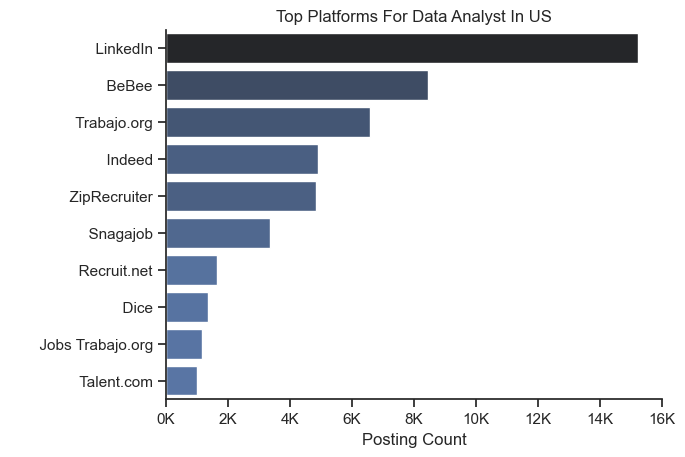

In [5]:
# combine matplot and seaborn to design and showing plot
sns.set_theme(style='ticks')
sns.barplot(df_job_via,x='count',y='job_via',hue='count',palette='dark:b_r',legend=False)
sns.despine()
ax = plt.gca()
plt.title('Top Platforms For Data Analyst In US')
plt.xlabel('Posting Count')
plt.ylabel(' ')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{int(x/1000)}K"))

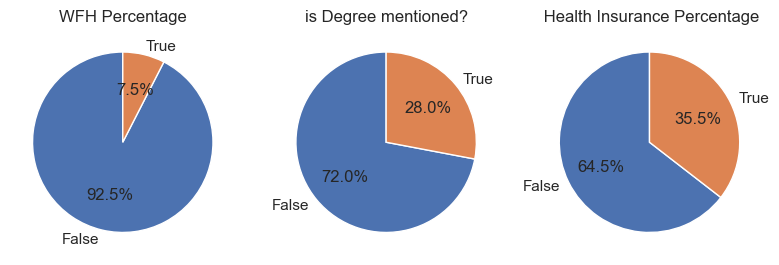

In [12]:
# creating a dict of column names and customized title for each chart
column_title = {
    'job_work_from_home' : 'WFH Percentage',
    'job_no_degree_mention' : 'is Degree mentioned?',
    'job_health_insurance'  : ' Health Insurance Percentage'
}
fig,ax = plt.subplots(1,3)
for i,(column,title) in enumerate(column_title.items()):
    ax[i].pie(DF_DA_US[column].value_counts(),startangle=90,labels=['False','True'],autopct = '%1.1f%%')
    ax[i].set_title(title)
    
fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
    

In [7]:
# filling NA values with median
median_yearly = df['salary_year_avg'].median()
median_hourly = df['salary_hour_avg'].median()
df['salary_year_avg'].fillna(median_yearly)
df['salary_hour_avg'].fillna(median_hourly)
# grouping df
df_grouped = df.groupby('job_title_short')[['salary_year_avg','salary_hour_avg']].median()

In [8]:
# sorting df
df_grouped.sort_values(by='salary_year_avg',ascending=False,inplace=True)

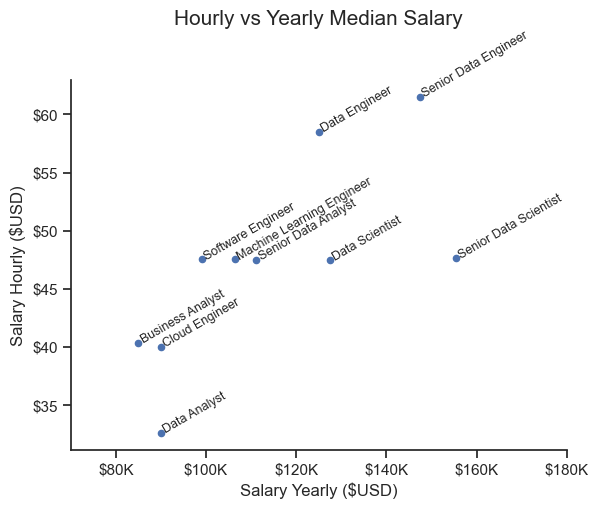

In [9]:
# creating scatter plot
df_grouped.plot(kind='scatter',x='salary_year_avg',y='salary_hour_avg')
# making text of job Titles on each dot 
for i,text in enumerate(df_grouped.index):
    plt.text(df_grouped['salary_year_avg'].iloc[i],df_grouped['salary_hour_avg'].iloc[i],text,rotation = 30,fontsize=9)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x/1000)}K"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y)}"))
sns.set_theme(style='ticks')
sns.despine()
plt.title('Hourly vs Yearly Median Salary',pad=40,size=15)
plt.ylabel('Salary Hourly ($USD)')
plt.xlabel('Salary Yearly ($USD)')
plt.xlim(70000,180000)
plt.show()
    